# CIFAR-10 을 이용한 CNN 구축

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1821960915115514637
 xla_global_id: -1]

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

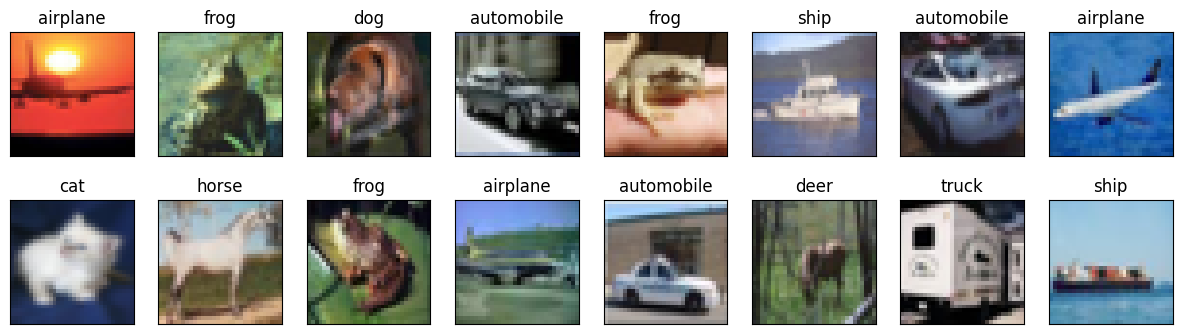

In [7]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_train))
    axes[i].imshow(X_train[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])

In [8]:
# data normalization
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

In [9]:
# one-hot encoding of class labels
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)

In [11]:
# model build
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 16, 16, 32)        0         
                                                        

In [13]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [14]:
model.fit(train_ds, epochs=5, validation_data=test_ds, verbose=1, shuffle=True)

Epoch 1/5
782/782 [==============================] - 22s 28ms/step - loss: 1.7141 - accuracy: 0.3691 - val_loss: 1.3789 - val_accuracy: 0.4917
Epoch 2/5
782/782 [==============================] - 21s 27ms/step - loss: 1.3765 - accuracy: 0.5023 - val_loss: 1.1850 - val_accuracy: 0.5748
Epoch 3/5
782/782 [==============================] - 21s 27ms/step - loss: 1.2375 - accuracy: 0.5598 - val_loss: 1.0935 - val_accuracy: 0.6116
Epoch 4/5
782/782 [==============================] - 22s 28ms/step - loss: 1.1483 - accuracy: 0.5941 - val_loss: 1.0354 - val_accuracy: 0.6339
Epoch 5/5
782/782 [==============================] - 23s 29ms/step - loss: 1.0938 - accuracy: 0.6112 - val_loss: 0.9355 - val_accuracy: 0.6686


In [15]:
model.evaluate(test_ds, verbose=0)

[0.9354581832885742, 0.6686000227928162]

In [19]:
y_pred = model.predict(X_test_scaled).argmax(axis=-1)
print(y_pred.shape)
print(y_pred)

313/313 [==============================] - 2s 5ms/step
(10000,)
[3 8 8 ... 5 4 7]


In [20]:
y_true = y_test.ravel()
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

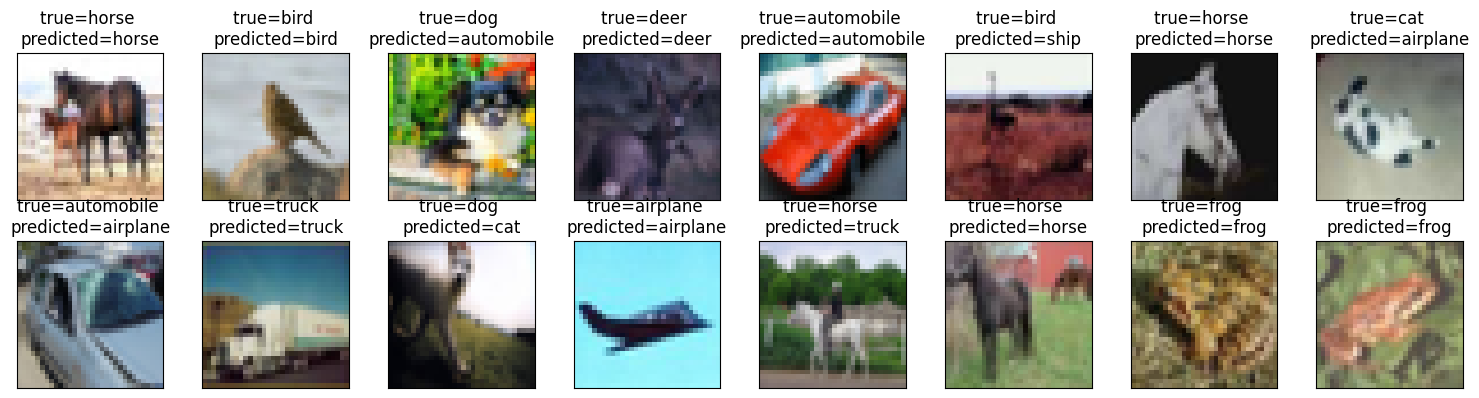

In [22]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()

# 16개의 무작위 이미지를 선택하여 표시
for i in range(16):
    idx = np.random.randint(0, len(y_test))  # 무작위 인덱스 생성
    axes[i].imshow(X_test[idx, :])      # 이미지 표시
    axes[i].set_xticks([])                    # x축 눈금 제거
    axes[i].set_yticks([])                    # y축 눈금 제거
    # 실제 라벨과 예측된 라벨로 제목 설정
    axes[i].set_title("true={} \npredicted={}".
                      format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))

plt.tight_layout() # 서브플롯들이 겹치지 않도록 레이아웃 조정
plt.show() 

## accuracy 시각화

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm

array([[734,  25,  51,  21,   5,   6,  10,   8,  93,  47],
       [ 13, 830,   3,   6,   4,   2,   8,   2,  23, 109],
       [ 99,   5, 536,  81,  74,  68,  77,  25,  27,   8],
       [ 41,  14,  79, 478,  46, 162,  94,  29,  27,  30],
       [ 38,   5, 137,  71, 509,  42,  93,  82,  16,   7],
       [ 24,   7,  80, 215,  30, 527,  30,  56,  17,  14],
       [ 10,   7,  50,  64,  34,  14, 797,   3,   9,  12],
       [ 17,   1,  41,  48,  59,  79,  12, 707,   9,  27],
       [ 72,  46,  14,  14,   3,   6,   5,   5, 807,  28],
       [ 32, 118,   6,  14,   7,   3,   7,  15,  37, 761]], dtype=int64)

### heatmap 작성

Test Accuracy : 0.6686


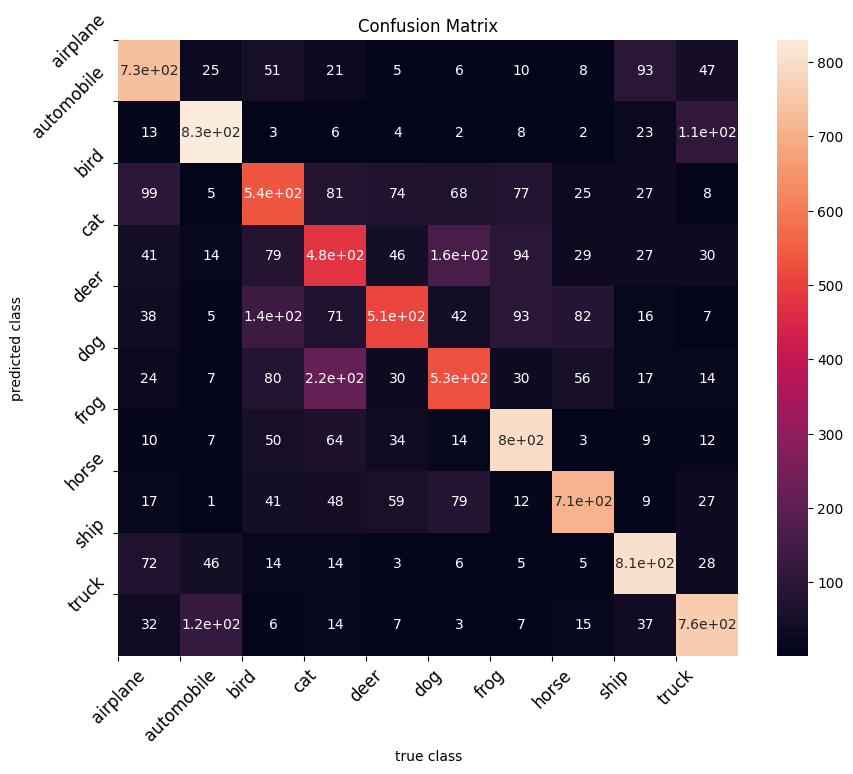

In [24]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True)

plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교